In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

2023-06-02 15:30:39.288447: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-02 15:30:39.313909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 15:30:39.710630: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

2023-06-02 15:30:40.553495: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 15:30:40.620801: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 15:30:40.620938: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
resnet = tf.keras.applications.resnet50.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(32,32,1),
    pooling=None,
    classes=10,
)

In [4]:
cfg = resnet.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 28, 28, 1)
model = tf.keras.Model.from_config(cfg)

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
)

Epoch 1/20


2023-06-02 15:30:47.582918: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-02 15:30:48.371116: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-02 15:30:48.892307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-02 15:30:48.899454: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f436de2f310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-02 15:30:48.899465: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-06-02 15:30:48.970569: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-02 15:30:49.006354: I ./tensorflow/compiler/jit/device_compil

422/422 [==============================] - 20s 23ms/step - loss: 0.5060 - accuracy: 0.8510 - val_loss: 0.1726 - val_accuracy: 0.9480
Epoch 2/20
422/422 [==============================] - 7s 18ms/step - loss: 0.1069 - accuracy: 0.9667 - val_loss: 0.0806 - val_accuracy: 0.9763
Epoch 3/20
422/422 [==============================] - 7s 18ms/step - loss: 0.0617 - accuracy: 0.9800 - val_loss: 0.0742 - val_accuracy: 0.9782
Epoch 4/20
422/422 [==============================] - 7s 18ms/step - loss: 0.0355 - accuracy: 0.9882 - val_loss: 0.0636 - val_accuracy: 0.9812
Epoch 5/20
422/422 [==============================] - 8s 18ms/step - loss: 0.0251 - accuracy: 0.9914 - val_loss: 0.0699 - val_accuracy: 0.9817
Epoch 6/20
422/422 [==============================] - 8s 18ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.0558 - val_accuracy: 0.9842
Epoch 7/20
422/422 [==============================] - 8s 18ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0551 - val_accuracy: 0.9858
Epoch 8/2

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss," Accuracy: ", test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0666 - accuracy: 0.9845
Loss:  0.06659268587827682  Accuracy:  0.984499990940094


313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



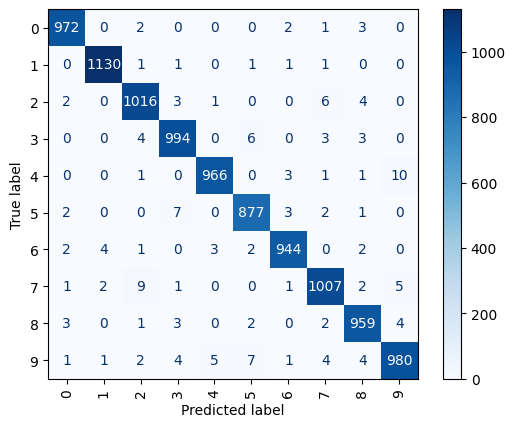

In [8]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

print(classification_report(y_pred=Y_pred_classes, y_true=Y_true))
cm = confusion_matrix(Y_true, Y_pred_classes)
ConfusionMatrixDisplay(cm).plot(cmap='Blues', xticks_rotation='vertical', values_format='d')

In [9]:
model.save('models/resnet50-tf.h5')